# Hello Qubit using the cirq library
In this tutorial you will learn how to make the hello world equivalent in the land of quantum computing. I will explain some basic concepts of quantum mechanics as well and how this applies to computer science. You will learn how to program a basic circuit in cirq using the principles that we will go over beforehand and then use the quantum simulator in cirq to get an output.

### What is a qubit?
A qubit is a quantum bit. As we already know, in classical computers data is handled in bits, and we know that a bit can be either 0 or 1. Classical logic is built on this principle of boolean and is how regular computers function.

In classical logic gates, information is lost as data is passed through. For example, an AND gate with two inputs could return 0, however there is no possible way of telling what the two inputs were. We can therefore say that a property of these gates is that the computation is non-reversible.

In quantum mechanics, only unitary operations are allowed, if only unitary operations are used this means that the computation is reversible. This is clearly a contridiction with the properties of classical logic gates which we have just discussed therefore quantum computers must use its own set of logic gates which can create results not possible in a classical system.



### Quantum gates
So, we know that quantum computers can't use traditional logic gates for computation but, what do they use instead? The answer is quantum gates. As mentioned above, quantum computers must use their own set of logic gates in order to comply with quantum mechanics.

In this notebook you will be introduced to two very important quantum gates. They are the Hadamard gate (H gate) and the Controlled NOT gate (CNOT). These two gates have very important effects on the qubits they are applied to and are a fundamental part of quantum computation.

The Hadamard gate, when applied to a qubit puts the qubit into a state of superposition. In this state, we have no way of knowing the value of the qubit without observation. Whilst we have not observed it we can say that the qubit is 1 and 0 at the same time. This a unique quantum property that is not found in classical bits. The qubit is continually in this superposition until we observe it, at which point, its wave function collapses into either a 1 or a 0, with a 50% probability (theoretically).

A Controlled NOT gate is much similar to a classical NOT, however, has a control bit (in this case qubit). We have one qubit as the control and the other which the gate will actually be applied to. If the control qubit is 1 then the NOT gate acticates and the second qubit is flipped, if the control bit is 0 then the NOT gate is not activated and the circuit will continue as if it wasn't there. When we use a superposed qubit as the control and have another qubit as an operand, this creates quantum entanglement. This is another fundamental state of quantum computing and will be used throughout quantum programs. When qubits are entangled, it means that their values are not independant from each other. In our case, the value of the second qubit is determined by whether the control qubit activates the NOT gate and therefore, the qubits are entangled.

### Import cirq library with an SVG circuit converter
To start our program we will import the cirq library. There is also a community contributed SVG circuit generator which I will use in order to more clearly visualise our circuit.

In [1]:
import cirq
from cirq.contrib.svg import SVGCircuit

### Create our qubits
We can now declare our qubits in cirq, we shall call them A and B.

In [7]:
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

### Create circuit
We now can create our circuit using the qubits we just created. First, we apply a Hadamard gate to A in order to place it in a superposition. Next, we can CNOT B with A as the control, this will entangle both of our qubits as B's output now depends on what A collapses into when it is observed. To complete our circuit, we will measure both A and B. This will make both A and B collapse into either 1 or 0, giving us our result.

In [3]:
circuit = cirq.Circuit(
    cirq.H(a),
    cirq.CNOT(a,b),
    cirq.measure(a,b)
)

### Circuit representation
We can visualise the circuit we just made using the SVGCircuit function from community contributors in cirq.

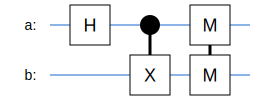

In [6]:
SVGCircuit(circuit)

### Initiate simulation
Now that we have our circuit built, we can use cirq's quantum simulator to actually test it.

In [8]:
simulator = cirq.Simulator()

### Run simulation
Finally, we can run the simulation of our circuit and observe the result. We pass in the circuit to the function and can also specify a number of repetitions for the simulation to run. Now, the number that this simulation repeats does not necessarily matter in this context as we do not have any quantum noise to worry about, so we can be sure the results will be exactly as expected. If we were running this code on a real quantum computer the physical running environment (such as temperature) creates noise which affects the outcome probability of the superposition.

In [9]:
result = simulator.run(circuit, repetitions=20)
print(result)

a,b=00010101000110111101, 00010101000110111101


### Result findings
As you can see, the states of A and B at each measurement are identical. This proves that A and B were entangled and that A was in a superposition. If you run the simulation again, you will find that the bits will change however A and B remain identical.

Congratulations, you just made a quantum hello world program!